# Labeled Property Graph Play

The notebook looks at working with the LPG from SysML v2 clients

In [1]:
import pymbe.api as pm
from pymbe.label import get_label
import networkx as NX
import matplotlib.pyplot as plt

from pymbe.interpretation.interp_playbooks import random_generator_playbook
from pymbe.interpretation.results import pprint_interpretation

In [2]:
pm.UI.new(host_url="http://sysml2-sst.intercax.com")

DockPop(children=(UI(children=(SysML2ClientWidget(children=(Text(value='http://sysml2-sst.intercax.com', descr…

In [3]:
ui, *_ = _.children
client, tree, inspector, lpg = ui.children
client.project_selector.value = client.project_selector.options["Kerbal (2021-04-17 18:03:01)"]
client._download_elements()

In [4]:
lpg.graph

In [5]:
shorten_pre_bake = {
    'RT-10 "Hammer" Solid Fuel Booster': "RT-10",
    'RT-5 "Flea" Solid Fuel Booster': "RT-5",
    'LV-T45 "Swivel" Liquid Fuel Engine': "LV-T45",
    'FL-T100 Fuel Tank': "FL-T100",
    'FL-T200 Fuel Tank': "FL-T200"
}

In [6]:
random_rez = random_generator_playbook(
    lpg,
    shorten_pre_bake
)

c:\users\bjorn\documents\git\pymbe\src\pymbe\graph\lpg.py:253: UserWarning: These edge types are not in the graph: {('FeatureMembership', 'FeatureValue', 'Import', 'Membership', 'ParameterMembership', 'Redefinition', 'ResultExpressionMembership', 'ReturnParameterMembership', 'Superclassing')}.
  warn(f"These edge types are not in the graph: {mismatched_edge_types}.")
c:\users\bjorn\documents\git\pymbe\src\pymbe\graph\lpg.py:253: UserWarning: These edge types are not in the graph: {('FeatureMembership', 'FeatureTyping', 'FeatureValue', 'Import', 'Membership', 'ParameterMembership', 'Redefinition', 'ResultExpressionMembership', 'ReturnParameterMembership')}.
  warn(f"These edge types are not in the graph: {mismatched_edge_types}.")
c:\users\bjorn\documents\git\pymbe\src\pymbe\graph\lpg.py:253: UserWarning: These edge types are not in the graph: {('FeatureTyping', 'FeatureValue', 'Import', 'Membership', 'ParameterMembership', 'Redefinition', 'ResultExpressionMembership', 'ReturnParameterM

In [7]:
pprint_interpretation(random_rez, lpg.nodes)

['RT-5 "Flea" Solid Fuel Booster, id = 83842e20-04ce-4df8-84b4-7b7b2efb83a0, size = 37',
 [RT-5#0],
 [RT-5#1],
 [RT-5#2],
 [RT-5#3],
 [RT-5#4],
 ['..'],
 'RT-10 "Hammer" Solid Fuel Booster, id = a8235762-e6a8-424f-a08d-e1f93569ccbc, size = 3',
 [RT-10#0],
 [RT-10#1],
 [RT-10#2],
 'LV-T45 "Swivel" Liquid Fuel Engine, id = 8b5b7ee8-f1ba-48b6-b06a-824c203af623, size = 40',
 [LV-T45#0],
 [LV-T45#1],
 [LV-T45#2],
 [LV-T45#3],
 [LV-T45#4],
 ['..'],
 'FL-T200 Fuel Tank, id = ac8d6db7-57ec-4862-885c-3060750b2f5c, size = 66',
 [FL-T200#0],
 [FL-T200#1],
 [FL-T200#2],
 [FL-T200#3],
 [FL-T200#4],
 ['..'],
 'FL-T100 Fuel Tank, id = 391427e3-154a-48ed-9a2a-46c6279585e7, size = 84',
 [FL-T100#0],
 [FL-T100#1],
 [FL-T100#2],
 [FL-T100#3],
 [FL-T100#4],
 ['..'],
 'Solid Stage, id = d29dee98-5b9d-4a78-8532-95a82e47b8bc, size = 0',
 'Liquid Stage, id = 4c593e66-3737-407b-bbe9-0354a7f3d84b, size = 5',
 [LS#0],
 [LS#1],
 [LS#2],
 [LS#3],
 [LS#4],
 ['..'],
 'Coupler, id = db167a72-ec46-4176-9436-b9f0c17e7d

In [8]:
len(lpg.nodes)

155

In [17]:
banded_feature_graph = lpg.get_projection("Banded Graph")

c:\users\bjorn\documents\git\pymbe\src\pymbe\graph\lpg.py:253: UserWarning: These edge types are not in the graph: {('FeatureValue', 'Import', 'Membership', 'ParameterMembership', 'Redefinition', 'ResultExpressionMembership', 'ReturnParameterMembership', 'FeatureMembership', 'FeatureTyping')}.
  warn(f"These edge types are not in the graph: {mismatched_edge_types}.")


In [18]:
len(banded_feature_graph.nodes)

71

In [19]:
banded_feature_graph

In [20]:
xes = []
for key, ele in client.elements_by_id.items():
    if 'name' in ele and ele['name'] == '$x':
        xes.append(ele)

In [21]:
xes[0]['@id']

'3cfd0006-5b58-4891-a461-821d5190f9e3'

In [22]:
extended_banded_feature_graph = lpg.get_projection("Expanded Banded Graph")

1

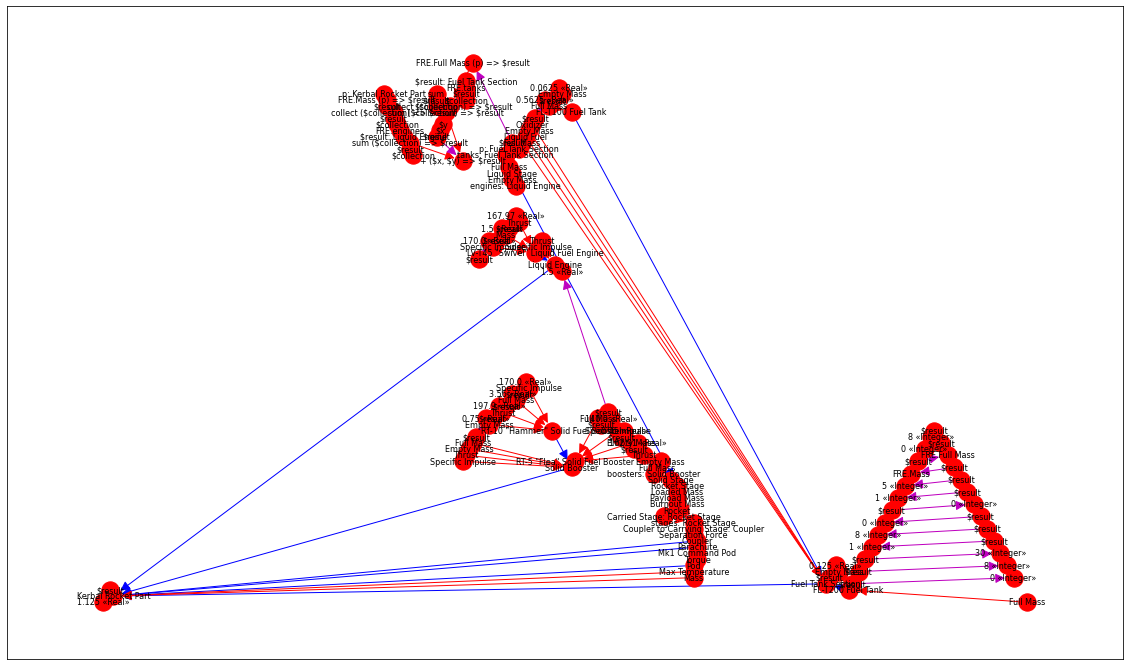

In [26]:
pos = NX.planar_layout(extended_banded_feature_graph)

plt.figure(figsize=(20, 12))
        
NX.draw_networkx_nodes(extended_banded_feature_graph, pos, nodelist=extended_banded_feature_graph.nodes, node_color="r")

node_labels = {}

for node in extended_banded_feature_graph.nodes:
    label = get_label(lpg.nodes[node], lpg.nodes).replace('$', '\$')
    node_labels.update({node: label})

sc_edges = []
fm_edges = []
ft_edges = []
pm_edges = []
rpm_edges = []

for edg in extended_banded_feature_graph.edges:
    if edg[2] == 'Superclassing':
        sc_edges.append([edg[0], edg[1]])
    elif edg[2] == 'FeatureMembership^-1':
        fm_edges.append([edg[0], edg[1]])
    elif edg[2] == 'FeatureMembership^-1':
        pm_edges.append([edg[0], edg[1]])
    elif edg[2] == 'ReturnParameterMembership^-1':
        rpm_edges.append([edg[0], edg[1]])
        
NX.draw_networkx_labels(extended_banded_feature_graph, pos, node_labels, font_size=8)
NX.draw_networkx_edges(extended_banded_feature_graph, pos, edgelist=sc_edges, edge_color="b", arrowsize=20)
NX.draw_networkx_edges(extended_banded_feature_graph, pos, edgelist=fm_edges, edge_color="r", arrowsize=20)
NX.draw_networkx_edges(extended_banded_feature_graph, pos, edgelist=pm_edges, edge_color="c", arrowsize=20)
NX.draw_networkx_edges(extended_banded_feature_graph, pos, edgelist=rpm_edges, edge_color="m", arrowsize=20)
1

In [24]:
fm_edges

[]

In [ ]:
xes[0]['@id'] in list(extended_banded_feature_graph.nodes)

In [ ]:
import pymbe.query.metamodel_navigator as MN

In [ ]:
elements_by_id = client.elements_by_id
MN.feature_multiplicity(elements_by_id['c9a16c71-4138-47b3-ae75-f5d0a525b633'], elements_by_id, bound="upper")

In [ ]:
import pymbe.query.query as Query
Query.roll_up_upper_multiplicity(
    lpg,
    client.elements_by_id['069675af-a514-40e3-9010-605553dec7c9'],
)

In [ ]:
banded_roots = [node for node in extended_banded_feature_graph.nodes if extended_banded_feature_graph.out_degree(node) == 0]

In [ ]:
for part_tree_root in banded_roots:
    try:
        part_path = NX.shortest_path(
            extended_banded_feature_graph,
            '069675af-a514-40e3-9010-605553dec7c9',
            part_tree_root)
    except NX.NetworkXNoPath:
        pass
    except NX.NodeNotFound:
        # nothing to roll up, so just use own multiplicity
        corrected_mult = feature_lower_multiplicity(feat, client)

The walk below shows how to get from parameters to the formulas calculating them or owning attribute usages.

In [ ]:
[get_label(lpg.nodes[step], lpg.nodes) for step in part_path]